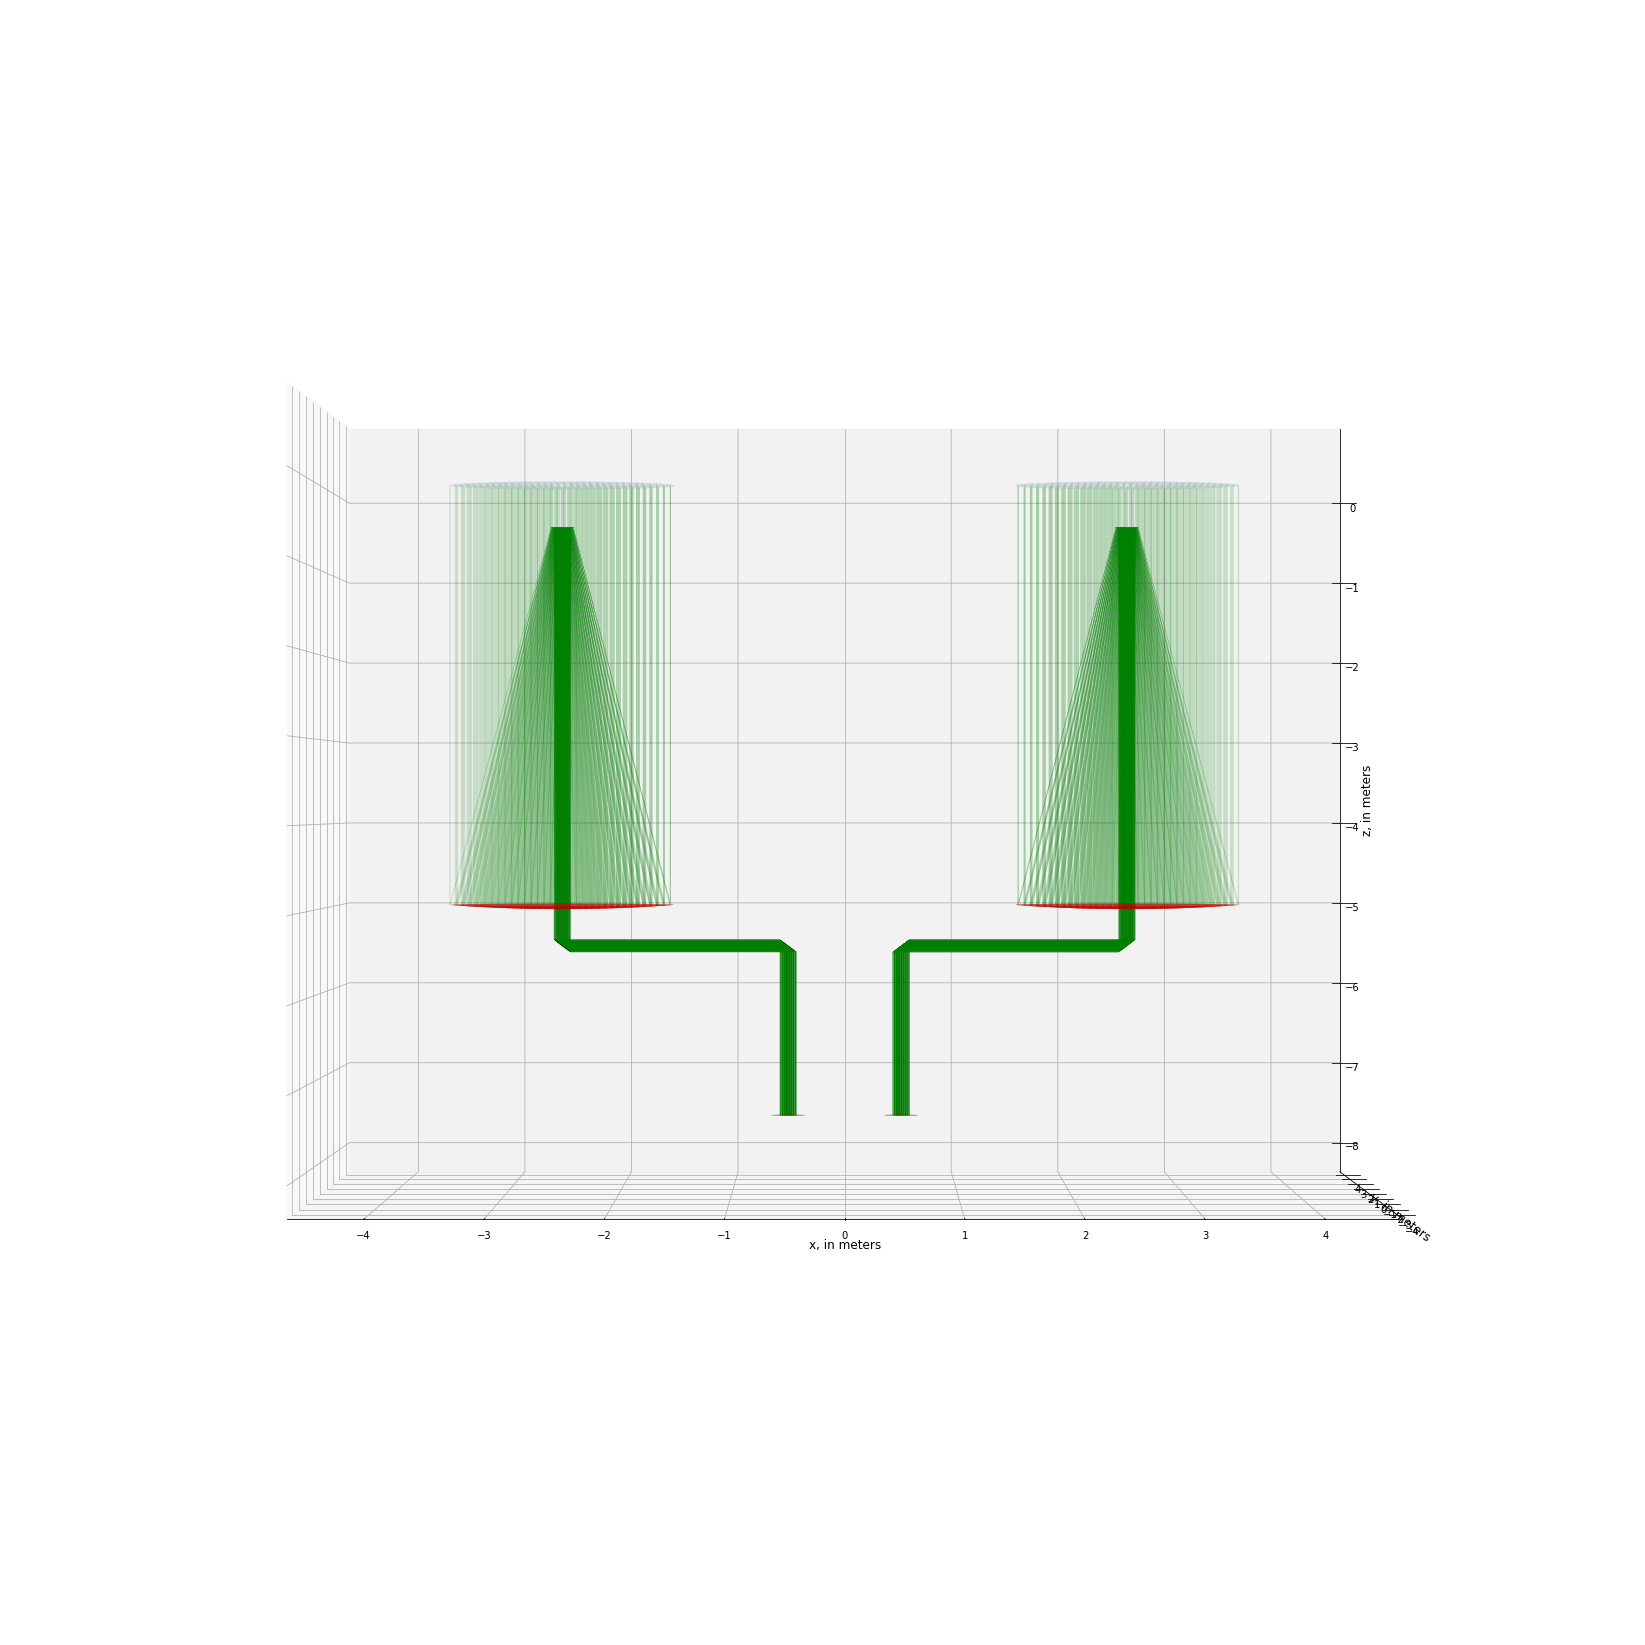

In [382]:
import pimms.optics as op
import copy
reload(op)
assembly=op.PhotonCollector()
m3=copy.deepcopy(assembly.parts[-1])
m3.boundary=(0,1)
m3.p[0]=2.
d1=op.Detector(m3.d_out, 128, p=np.copy(m3.p))
d1.p[2]=d1.p[2]-2
assembly.add_part(m3)
assembly.add_part(d1)
new_assembly=copy.deepcopy(assembly)
assembly.move([-2.5,0,0])
new_assembly.rotate(op.quat.from_angles(np.pi, 0.))
new_assembly.move([+2.5,0,0])
assembly.join(new_assembly)
del new_assembly
s=op.LightSource((np.pi,np.deg2rad(1e-1/3600.),np.inf))
p,q=s(assembly.get_entrance(), 1000, 1, sampling='dizzle')
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(0, -90))

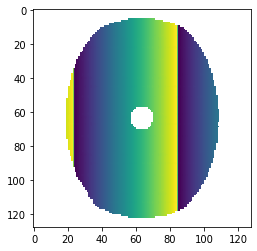

In [383]:
dets=assembly.get_detectors()
dets[0].photon_buffer=np.empty((0,),dtype=op.sptype)
for i in range(4):
    p,q=s(assembly.get_entrance(), 10000, 1., sampling='dizzle')
    trace,seq=assembly.trace(q,steps=6)
plt.imshow(dets[0].readout(clear_buffer=False)[1])

In [384]:
q.size

19831

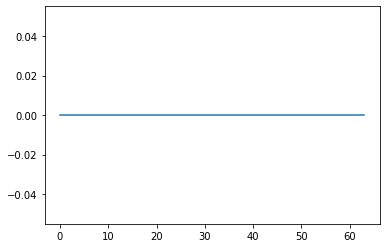

In [170]:
plt.plot(dets[0].readout(clear_buffer=False)[0][32,:])

In [139]:
dets[0].readout(clear_buffer=False)[0].sum()

860254.9581251761

In [141]:
dets[0].photon_buffer['weight'].size

3110719

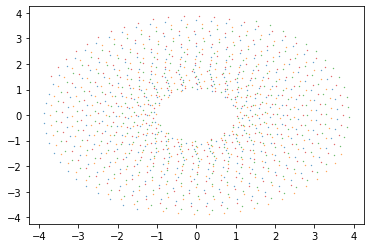

In [158]:
rho0=np.arange(1,4,0.01)
dphi0=np.pi*(16-1)/4/300/0.1/rho0
phi0=np.cumsum(dphi0)
x0=rho0*np.cos(phi0)
y0=rho0*np.sin(phi0)
phi1=np.cumsum(dphi0)+np.pi/2.
x1=rho0*np.cos(phi1)
y1=rho0*np.sin(phi1)
phi2=np.cumsum(dphi0)+np.pi
x2=rho0*np.cos(phi2)
y2=rho0*np.sin(phi2)
phi3=np.cumsum(dphi0)+3.*np.pi/2.
x3=rho0*np.cos(phi3)
y3=rho0*np.sin(phi3)
plt.scatter(x0,y0,s=.1)
plt.scatter(x1,y1,s=.1)
plt.scatter(x2,y2,s=.1)
plt.scatter(x3,y3,s=.1)

In [147]:
np.cumsum(np.arange(4))

array([0, 1, 3, 6])

In [353]:
op.quat.rotate(op.quat.from_angles(0., np.pi/4.), [1,0,0])

array([0.70710678, 0.        , 0.70710678])

In [368]:
assembly.parts[3].normal([0,0,0])

array([[0.70710678],
       [0.        ],
       [0.70710678]])

In [372]:
assembly.get_entrance()